<a href="https://colab.research.google.com/github/Alejandrov207/Prompt/blob/main/Finalprompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install git+https://github.com/huggingface/diffusers


  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-viotg2ay
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-viotg2ay
  Resolved https://github.com/huggingface/diffusers to commit cdadb023a298674239561d0395db2056b4f1d7d7
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.6 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.24.0.dev0-py3-none-any.whl size=1682392 sha256=38ce02ecf865d321bef7837f311988e5d10f97e069c65236f7c58405c9cef776
  Stored in directory: /tmp/pip-ephem-wheel-cache-upspupi8/wheels/f7/7d/99/d361489e5762e3464b3811bc629e94cf5bf5ef44dd5c3c4d52
Successfully built diffusers


In [2]:
pip install transformers accelerate safetensors


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 84.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 31.7 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.19.2
    Uninstalling huggingface-hub-0.19.2:
      Successfully uninstalled huggingface-hub-0.19.2


In [3]:
from diffusers import StableDiffusionXLPipeline
import torch
pipe = StableDiffusionXLPipeline.from_pretrained("segmind/SSD-1B", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")
# if using torch < 2.0
# pipe.enable_xformers_memory_efficient_attention()
prompt = "Perro comiendo hamburguesa" # Your prompt here
neg_prompt = "happy, blurry, high quality" # Negative prompt here
image = pipe(prompt=prompt, negative_prompt=neg_prompt,temperature=1).images[0]
print(image)


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7A060EEA8730>


tensor([[[0.6745, 0.6745, 0.6667,  ..., 0.5961, 0.6078, 0.6157],
         [0.6667, 0.6627, 0.6588,  ..., 0.5961, 0.6157, 0.6275],
         [0.6667, 0.6588, 0.6510,  ..., 0.6039, 0.6196, 0.6235],
         ...,
         [0.8078, 0.8157, 0.8510,  ..., 0.6431, 0.6392, 0.6118],
         [0.8314, 0.8118, 0.8275,  ..., 0.6000, 0.5020, 0.5529],
         [0.8235, 0.8078, 0.8235,  ..., 0.6588, 0.5608, 0.5725]],

        [[0.6157, 0.6078, 0.6000,  ..., 0.5373, 0.5451, 0.5569],
         [0.6039, 0.6000, 0.5922,  ..., 0.5294, 0.5529, 0.5647],
         [0.6078, 0.6039, 0.5882,  ..., 0.5373, 0.5529, 0.5569],
         ...,
         [0.7686, 0.7882, 0.8196,  ..., 0.6078, 0.6000, 0.5647],
         [0.8039, 0.7843, 0.7961,  ..., 0.5686, 0.4588, 0.4980],
         [0.8039, 0.7725, 0.7882,  ..., 0.6392, 0.5294, 0.5373]],

        [[0.5569, 0.5529, 0.5451,  ..., 0.4784, 0.4902, 0.4941],
         [0.5529, 0.5451, 0.5412,  ..., 0.4706, 0.4902, 0.5020],
         [0.5529, 0.5451, 0.5333,  ..., 0.4784, 0.4902, 0.

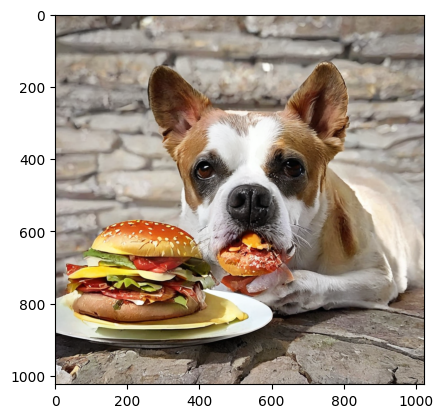

In [4]:
from PIL import Image
import torch
from torchvision import transforms

# Convierte el objeto de imagen a un tensor de PyTorch
transform = transforms.ToTensor()
image_tensor = transform(image)

# Muestra la imagen como un tensor de PyTorch
print(image_tensor)

# Si deseas visualizar la imagen, puedes hacerlo usando la biblioteca matplotlib
import matplotlib.pyplot as plt
plt.imshow(image_tensor.permute(1, 2, 0).numpy())
plt.show()
